<a href="https://colab.research.google.com/github/abahrii/Projet/blob/main/P3_Model_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook du création du modèle et la prédiction
Réalisé par : BAHRI Abdelghani

## 1. l'importation des outils / bibliothéques et de la base de données déja nettoyée

In [ ]:
import time

import numpy as np , matplotlib as plt
%pylab inline
from scipy import stats
from scipy.stats import chi2_contingency
from matplotlib.colors import LogNorm
from time import time

#from matplotlib import rc


import pandas as pd
%matplotlib inline
import seaborn as sns
from collections import Counter
import difflib

from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection , linear_model
from sklearn.linear_model import LinearRegression , Ridge
from sklearn import preprocessing , metrics , svm, kernel_ridge
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPRegressor
#from sklearn.svm import LinearSVR


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
/usr/lib/python3/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [ ]:
data_1516=pd.read_csv("cleaned_1516.csv")


In [ ]:
data_1516.describe()

,Unnamed: 0,NumberofFloors,NaturalGas(kBtu),SteamUse(kBtu),SiteEnergyUse(kBtu),Electricity(kBtu),Electricity(kWh),NumberofBuildings,OSEBuildingID,ENERGYSTARScore,Latitud,SiteEUI(kBtu/sf),DataYear,Longitud,SourceEUI(kBtu/sf),PropertyGFATotal,YearBuilt,data_EC2
count,6532.000000,6524.000000,6.513000e+03,6.513000e+03,6.517000e+03,6.513000e+03,6.513000e+03,6524.000000,6532.000000,4965.000000,6532.000000,6515.000000,6532.000000,6532.000000,6513.000000,6.532000e+03,6532.000000,6513.000000
mean,1677.491427,4.709841,1.308085e+06,2.671148e+05,5.203939e+06,3.597937e+06,1.054474e+06,1.087523,20873.922688,68.034642,47.624254,53.918235,2015.502756,-122.334886,132.985368,9.299621e+04,1968.102725,115.172587
std,968.252704,5.513154,5.744461e+06,3.751088e+06,1.833318e+07,1.261522e+07,3.697264e+06,1.610702,11862.687764,26.974337,0.047914,54.604631,0.500031,0.027274,135.674411,1.889301e+05,33.030551,484.329919
min,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-1.154170e+05,-3.382680e+04,1.000000,1.000000,1.000000,47.499170,0.000000,2015.000000,-122.414250,-2.000000,1.128500e+04,1900.000000,-0.800000
25%,841.000000,2.000000,0.000000e+00,0.000000e+00,9.177284e+05,6.352110e+05,1.861620e+05,1.000000,19943.500000,52.000000,47.600037,27.500000,2015.000000,-122.350754,74.000000,2.847200e+04,1948.000000,9.360000
50%,1677.500000,4.000000,3.019430e+05,0.000000e+00,1.775433e+06,1.161037e+06,3.402670e+05,1.000000,23056.000000,76.000000,47.618916,37.900002,2016.000000,-122.332630,95.300003,4.388400e+04,1974.000000,33.100000
75%,2517.000000,5.000000,1.136232e+06,0.000000e+00,4.112006e+06,2.779993e+06,8.147360e+05,1.000000,25856.250000,90.000000,47.657522,59.800000,2016.000000,-122.319596,143.400000,8.920000e+04,1997.000000,91.100000
max,3375.000000,99.000000,2.979090e+08,1.349435e+08,8.739237e+08,6.570744e+08,1.925775e+08,111.000000,50226.000000,100.000000,47.733870,834.400024,2016.000000,-122.220470,2620.000000,9.320156e+06,2015.000000,16870.980000


In [ ]:
data_1516.columns

Index(['Unnamed: 0', 'NumberofFloors', 'NaturalGas(kBtu)', 'SteamUse(kBtu)',
       'BuildingType', 'SiteEnergyUse(kBtu)', 'Electricity(kBtu)',
       'Electricity(kWh)', 'NumberofBuildings', 'OSEBuildingID',
       'ENERGYSTARScore', 'Latitud', 'SiteEUI(kBtu/sf)', 'DataYear',
       'Longitud', 'SourceEUI(kBtu/sf)', 'PropertyGFATotal', 'YearBuilt',
       'data_EC2'],
      dtype='object')

## 2- Feature engineering


Deux feautres faites, le premier feature à partir d'élement d'énergie (energie utilisée) qui représente la consommation totale d'énergie, et evalué l'autre feature avec l'EnergyStarScore par rapport aux emissions de CO2, ça ce basera sur le permis les données déclaratives du permis d'exploitation commerciale (taille et usage des bâtiments, mention de travaux récents, date de construction..).

In [ ]:
data_TCEnergy =  data_1516["SiteEnergyUse(kBtu)"]
data_EmissionsCO2= data_1516["data_EC2"]
data_1516["data_TCEnergy"] = data_TCEnergy
data_1516["data_EmissionsCO2"] = data_EmissionsCO2

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/lib/python3/dist-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


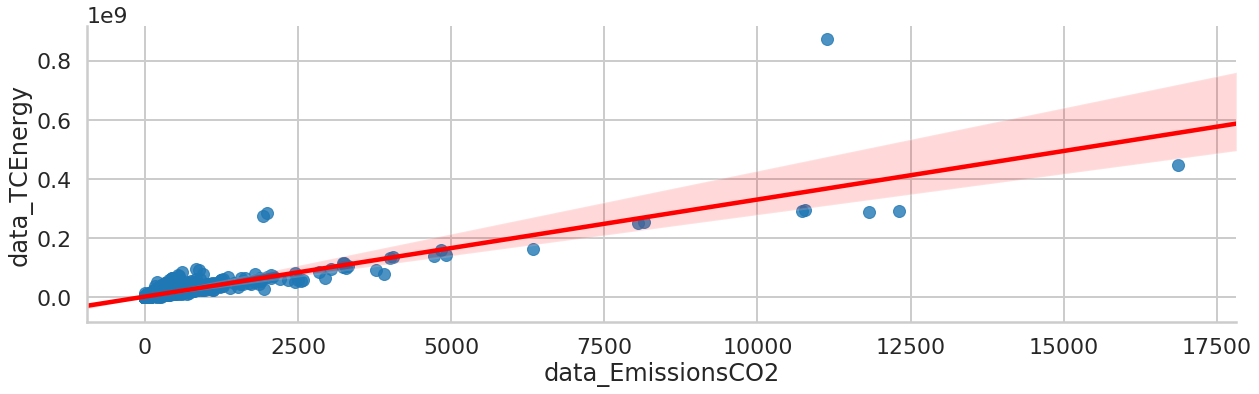

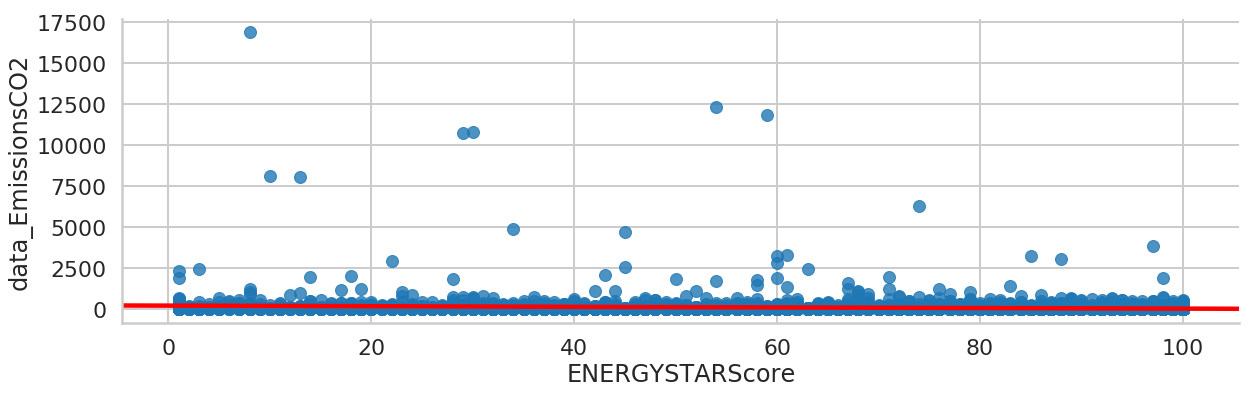

In [ ]:

sns.set_style("whitegrid")

with sns.plotting_context(context='poster'):
    sns.lmplot("data_EmissionsCO2","data_TCEnergy", data_1516, line_kws={'color': 'red'}, size=6, aspect=3)
    sns.lmplot("ENERGYSTARScore","data_EmissionsCO2", data_1516, line_kws={'color': 'red'}, size=6, aspect=3)


In [ ]:
data_1516.columns

Index(['Unnamed: 0', 'NumberofFloors', 'NaturalGas(kBtu)', 'SteamUse(kBtu)',
       'BuildingType', 'SiteEnergyUse(kBtu)', 'Electricity(kBtu)',
       'Electricity(kWh)', 'NumberofBuildings', 'OSEBuildingID',
       'ENERGYSTARScore', 'Latitud', 'SiteEUI(kBtu/sf)', 'DataYear',
       'Longitud', 'SourceEUI(kBtu/sf)', 'PropertyGFATotal', 'YearBuilt',
       'data_EC2', 'data_TCEnergy', 'data_EmissionsCO2'],
      dtype='object')

In [ ]:
dt_1516= data_1516[[ 'NaturalGas(kBtu)','SiteEUI(kBtu/sf)','SteamUse(kBtu)','SourceEUI(kBtu/sf)', 'Electricity(kBtu)','ENERGYSTARScore','data_TCEnergy', 'data_EmissionsCO2']]

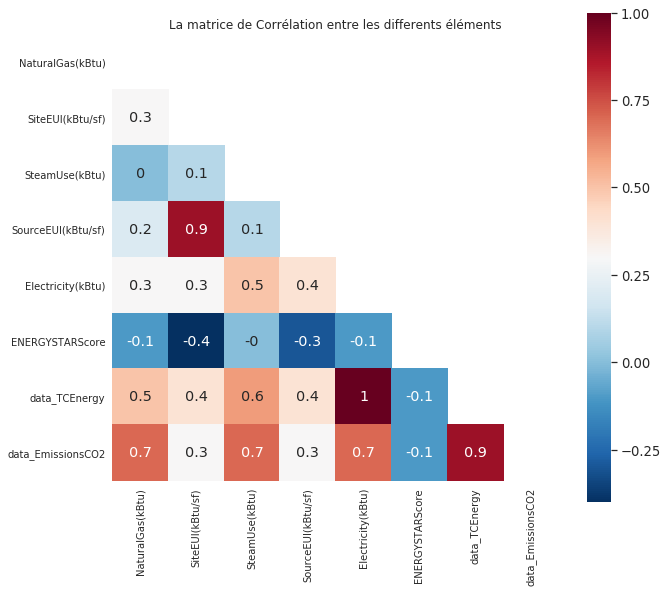

In [ ]:
dt_1516.columns
corr = dt_1516.corr()
corr = corr.round(1)
plt.figure(figsize=(10, 9))
plt.title("La matrice de Corrélation entre les differents éléments")

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.set(font_scale=1.2)
with sns.axes_style("white"):
    sns.heatmap(corr,  annot = True ,vmax=1, cmap="RdBu_r",square=True, mask=mask)

On peut voir,
    * L'utilisation de gaz naturel est assez fortement corrélée aux taux d'émission de CO2, ce qui est logique.
    * L'utilisation d'elécricité est fortement corrélée à data_TCEnergy(notre feature de la consommation totale d'énergie), ce qui est encore logique.

ENERGYSTARScore est faiblement corrélé à l'une des mesures de l'énergie ou les émissions, car un ENERGYSTARScore plus élevée est censé refléter une utilisation plus efficace de l'énergie

Pour mieux comprendre le phénoméne, j'ai fait une petite matrice de coorélation entre les deux features crées et l'ENERGYSTARScore

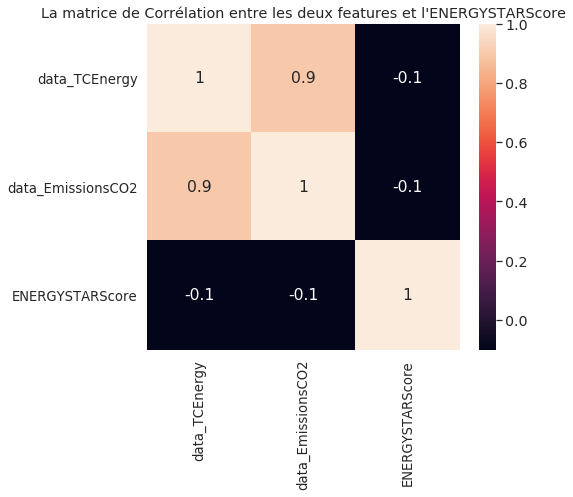

In [ ]:
corr = data_1516[["data_TCEnergy","data_EmissionsCO2","ENERGYSTARScore"]].corr()
corr = corr.round(1)
plt.figure(figsize=(7, 6))
plt.title("La matrice de Corrélation entre les deux features et l'ENERGYSTARScore")

sns.set(font_scale=1.3)
with sns.axes_style("white"):
    sns.heatmap(corr,  annot = True ,vmax=1)

On peut voir qu'il y'a une forte coorélation entre le feature "data_TCEnergy" et le feature "data_EmissionsCO2".

Transformer les données de la colonne des types de batiments on forme binnaire pour avoir les catégories de ces batiments et pour faire notre modèle

In [ ]:
dumm=pd.get_dummies(data_1516.BuildingType)
merged= pd.concat([data_1516,dumm],axis='columns')
merged

,Unnamed: 0,NumberofFloors,NaturalGas(kBtu),SteamUse(kBtu),BuildingType,SiteEnergyUse(kBtu),Electricity(kBtu),Electricity(kWh),NumberofBuildings,OSEBuildingID,...,data_TCEnergy,data_EmissionsCO2,Campus,Multifamily HR (10+),Multifamily LR (1-4),Multifamily MR (5-9),NonResidential,Nonresidential COS,Nonresidential WA,SPS-District K-12
0,0,12.0,1.272388e+06,2023032.0,NonResidential,6.981428e+06,3.686160e+06,1.080307e+06,1.0,1,...,6.981428e+06,249.43,0,0,0,0,1,0,0,0
1,1,11.0,4.448985e+06,0.0,NonResidential,8.354235e+06,3.905411e+06,1.144563e+06,1.0,2,...,8.354235e+06,263.51,0,0,0,0,1,0,0,0
2,2,41.0,3.709900e+06,19660404.0,NonResidential,7.313066e+07,4.976244e+07,1.458393e+07,1.0,3,...,7.313066e+07,2061.48,0,0,0,0,1,0,0,0
3,3,10.0,2.001894e+06,23458518.0,NonResidential,2.822932e+07,2.769023e+06,8.115210e+05,1.0,5,...,2.822932e+07,1936.34,0,0,0,0,1,0,0,0
4,4,18.0,8.763105e+06,0.0,NonResidential,1.482910e+07,6.066245e+06,1.777841e+06,1.0,8,...,1.482910e+07,507.70,0,0,0,0,1,0,0,0
5,5,2.0,4.781283e+06,0.0,Nonresidential COS,1.205198e+07,7.271004e+06,2.130921e+06,1.0,9,...,1.205198e+07,304.62,0,0,0,0,0,1,0,0
6,6,11.0,3.573255e+06,0.0,NonResidential,6.252842e+06,2.679698e+06,7.853420e+05,1.0,10,...,6.252842e+06,208.46,0,0,0,0,1,0,0,0
7,7,8.0,3.150790e+05,2003108.0,NonResidential,6.426022e+06,4.108004e+06,1.203937e+06,1.0,11,...,6.426022e+06,199.99,0,0,0,0,1,0,0,0
8,8,15.0,5.278400e+06,0.0,NonResidential,1.263374e+07,7.355649e+06,2.155728e+06,1.0,12,...,1.263374e+07,331.61,0,0,0,0,1,0,0,0
9,9,6.0,7.338030e+05,1483476.0,Multifamily MR (5-9),4.587231e+06,2.370050e+06,6.945930e+05,1.0,13,...,4.587231e+06,170.00,0,0,0,1,0,0,0,0


In [ ]:
dat_1516= merged.drop(['BuildingType','data_EC2'],axis='columns')
dat_1516.describe()

,Unnamed: 0,NumberofFloors,NaturalGas(kBtu),SteamUse(kBtu),SiteEnergyUse(kBtu),Electricity(kBtu),Electricity(kWh),NumberofBuildings,OSEBuildingID,ENERGYSTARScore,...,data_TCEnergy,data_EmissionsCO2,Campus,Multifamily HR (10+),Multifamily LR (1-4),Multifamily MR (5-9),NonResidential,Nonresidential COS,Nonresidential WA,SPS-District K-12
count,6532.000000,6524.000000,6.513000e+03,6.513000e+03,6.517000e+03,6.513000e+03,6.513000e+03,6524.000000,6532.000000,4965.000000,...,6.517000e+03,6513.000000,6532.000000,6532.000000,6532.000000,6532.000000,6532.000000,6532.000000,6532.000000,6532.000000
mean,1677.491427,4.709841,1.308085e+06,2.671148e+05,5.203939e+06,3.597937e+06,1.054474e+06,1.087523,20873.922688,68.034642,...,5.203939e+06,115.172587,0.007042,0.032609,0.306338,0.168708,0.433099,0.022198,0.000153,0.029853
std,968.252704,5.513154,5.744461e+06,3.751088e+06,1.833318e+07,1.261522e+07,3.697264e+06,1.610702,11862.687764,26.974337,...,1.833318e+07,484.329919,0.083629,0.177624,0.461007,0.374522,0.495542,0.147340,0.012373,0.170195
min,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-1.154170e+05,-3.382680e+04,1.000000,1.000000,1.000000,...,0.000000e+00,-0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,841.000000,2.000000,0.000000e+00,0.000000e+00,9.177284e+05,6.352110e+05,1.861620e+05,1.000000,19943.500000,52.000000,...,9.177284e+05,9.360000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1677.500000,4.000000,3.019430e+05,0.000000e+00,1.775433e+06,1.161037e+06,3.402670e+05,1.000000,23056.000000,76.000000,...,1.775433e+06,33.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2517.000000,5.000000,1.136232e+06,0.000000e+00,4.112006e+06,2.779993e+06,8.147360e+05,1.000000,25856.250000,90.000000,...,4.112006e+06,91.100000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,3375.000000,99.000000,2.979090e+08,1.349435e+08,8.739237e+08,6.570744e+08,1.925775e+08,111.000000,50226.000000,100.000000,...,8.739237e+08,16870.980000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Créer une nouvelle base de données qui correspond à nos modèles de prédiction

In [ ]:
X_1516= dat_1516[['Campus','Multifamily HR (10+)','Multifamily LR (1-4)','Multifamily MR (5-9)','NonResidential','Nonresidential COS','Nonresidential WA','SPS-District K-12','NumberofBuildings','YearBuilt','NumberofFloors','PropertyGFATotal','Longitud','Latitud','Electricity(kBtu)','SteamUse(kBtu)','NaturalGas(kBtu)','ENERGYSTARScore','data_TCEnergy','data_EmissionsCO2','DataYear']]
X_1516.fillna(X_1516.mean(), inplace=True)
X_1516

/usr/lib/python3/dist-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Campus,Multifamily HR (10+),Multifamily LR (1-4),Multifamily MR (5-9),NonResidential,Nonresidential COS,Nonresidential WA,SPS-District K-12,NumberofBuildings,YearBuilt,...,PropertyGFATotal,Longitud,Latitud,Electricity(kBtu),SteamUse(kBtu),NaturalGas(kBtu),ENERGYSTARScore,data_TCEnergy,data_EmissionsCO2,DataYear
0,0,0,0,0,1,0,0,0,1.0,1927,...,88434,-122.337997,47.612190,3.686160e+06,2.023032e+06,1.272388e+06,65.000000,6.981428e+06,249.430000,2015
1,0,0,0,0,1,0,0,0,1.0,1996,...,103566,-122.333358,47.613106,3.905411e+06,0.000000e+00,4.448985e+06,51.000000,8.354235e+06,263.510000,2015
2,0,0,0,0,1,0,0,0,1.0,1969,...,961990,-122.337699,47.613349,4.976244e+07,1.966040e+07,3.709900e+06,18.000000,7.313066e+07,2061.480000,2015
3,0,0,0,0,1,0,0,0,1.0,1926,...,61320,-122.336609,47.614216,2.769023e+06,2.345852e+07,2.001894e+06,1.000000,2.822932e+07,1936.340000,2015
4,0,0,0,0,1,0,0,0,1.0,1980,...,119890,-122.340924,47.613754,6.066245e+06,0.000000e+00,8.763105e+06,67.000000,1.482910e+07,507.700000,2015
5,0,0,0,0,0,1,0,0,1.0,1999,...,97288,-122.336764,47.616439,7.271004e+06,0.000000e+00,4.781283e+06,68.034642,1.205198e+07,304.620000,2015
6,0,0,0,0,1,0,0,0,1.0,1926,...,83008,-122.332741,47.614114,2.679698e+06,0.000000e+00,3.573255e+06,25.000000,6.252842e+06,208.460000,2015
7,0,0,0,0,1,0,0,0,1.0,1926,...,102761,-122.331309,47.612902,4.108004e+06,2.003108e+06,3.150790e+05,68.034642,6.426022e+06,199.990000,2015
8,0,0,0,0,1,0,0,0,1.0,1904,...,163984,-122.332553,47.602589,7.355649e+06,0.000000e+00,5.278400e+06,46.000000,1.263374e+07,331.610000,2015
9,0,0,0,1,0,0,0,0,1.0,1910,...,63712,-122.332149,47.602784,2.370050e+06,1.483476e+06,7.338030e+05,2.000000,4.587231e+06,170.000000,2015


## 3- Modèles de prédiction


### Modèle de la consommation totale d'énergies (CTE)


Notre objectif de prédiction est basé sur les champs et les données déclaratives du permis d'exploitation, donc on commence à prédire la consommation totale d'energie par rapport à nos données.

In [ ]:
XCTE_1516= X_1516[['Campus','Multifamily HR (10+)','Multifamily LR (1-4)','Multifamily MR (5-9)','NonResidential','Nonresidential COS','Nonresidential WA','SPS-District K-12','NumberofBuildings','YearBuilt','NumberofFloors','PropertyGFATotal','Longitud','Latitud','data_TCEnergy','DataYear']]

In [ ]:
X= XCTE_1516.iloc[:,0:-2]
y= XCTE_1516.iloc[:,-2]
X.shape

(6532, 14)

In [ ]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y,
                                test_size=0.3, random_state=38) # 30% des données dans le jeu de test

In [ ]:

std_scale = preprocessing.StandardScaler().fit(x_train)
x_train_std = std_scale.transform(x_train)
x_test_std = std_scale.transform(x_test)

### 1- La regression linéaire


La forme de régression la plus simple est la régression linéaire, qui suppose que les prédicteurs ont une relation linéaire avec la variable cible. Les variables d'entrée sont supposées avoir une distribution gaussienne. Une autre hypothèse est que les prédicteurs ne sont pas fortement corrélés entre eux.

In [ ]:
lr = linear_model.LinearRegression()
tic = time()
lr.fit(x_train_std, y_train)
print("done in {:.3f}s".format(time() - tic))

done in 0.005s


In [ ]:
for coef in zip(x_train.columns, lr.coef_):
    print(coef)


('Campus', 6.528854698861672e+16)
('Multifamily HR (10+)', 1.3860295983494074e+17)
('Multifamily LR (1-4)', 3.619635636690843e+17)
('Multifamily MR (5-9)', 2.9413756126621984e+17)
('NonResidential', 3.878593069321419e+17)
('Nonresidential COS', 1.1170932757659917e+17)
('Nonresidential WA', 1145706285178920.0)
('SPS-District K-12', 1.3209310105518094e+17)
('NumberofBuildings', 2526560.0)
('YearBuilt', -142944.0)
('NumberofFloors', -1264072.0)
('PropertyGFATotal', 14562688.0)
('Longitud', 123405.0)
('Latitud', -69484.0)


In [ ]:
pred_train_lr= lr.predict(x_train_std)
print(np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print(r2_score(y_train, pred_train_lr))



12509638.96741174
0.6354153999954615


In [ ]:
pred_test_lr= lr.predict(x_test_std)
print( np.sqrt(mean_squared_error(y_test,pred_test_lr)))
print(r2_score(y_test, pred_test_lr))

1.7663487380673648e+16
-2.691275574655699e+18


Le résultat montre que le RMSE, l'une des deux mesures d'évaluation, est de 12509638 pour les données d'entrainement. D'un autre côté, le score est de 63.53% pour les données d'entrainement, ce qui est une bonne performance.

### Régression régularisée

La régression linéaire fonctionne en sélectionnant des coefficients pour chaque variable indépendante qui minimise une fonction de perte. Cependant, si les coefficients sont trop grands, cela peut conduire à un overfitting du modèle sur l'ensemble de données d'entrainement. Un tel modèle ne généralisera pas bien sur les données invisibles. Pour pallier cette lacune, nous faisons une régularisation qui pénalise les gros coefficients.

La méthode de Kernel Ridge linéaire abordera l'algorithme de régularisation.

### 2- La régression ridge

La régression de Ridge est une extension de la régression linéaire où la fonction de perte est modifiée pour minimiser la complexité du modèle.


In [ ]:
rr = linear_model.Ridge(alpha=0.1)
tic = time()
rr.fit(x_train_std, y_train)
print("done in {:.3f}s".format(time() - tic))

done in 0.003s


In [ ]:
for coef in zip(x_train.columns,rr.coef_):
    print(coef)

('Campus', 1676517.907770501)
('Multifamily HR (10+)', -212428.0125687499)
('Multifamily LR (1-4)', -239194.12819230973)
('Multifamily MR (5-9)', -692255.8310803977)
('NonResidential', 637653.9539064794)
('Nonresidential COS', 106608.5473593545)
('Nonresidential WA', 0.0)
('SPS-District K-12', -371294.6041434321)
('NumberofBuildings', 2527475.495969687)
('YearBuilt', -142224.59151436243)
('NumberofFloors', -1263899.9806530771)
('PropertyGFATotal', 14561360.91361705)
('Longitud', 123215.22936506494)
('Latitud', -68931.7342586292)


In [ ]:
pred_train_rr= rr.predict(x_train_std)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(x_test_std)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr)))
print(r2_score(y_test, pred_test_rr))

12509610.57410471
0.6354170549993774
8049629.409510825
0.44107049175487845


Les résultats montre que les valeurs RMSE et R-carré pour le modèle de régression Ridge avec validation croisée sur les données d'entraînement sont respectivement de 12509610 et 63.54%. Les résultats de ces mesures sur les données de test sont respectivement de 8049629 et 44.11%.

### La régression ridge avec la validation croisée

In [ ]:
rr_cv = linear_model.Ridge()
parametr= {'alpha': [1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20, 30,50, 100, 200]}
ridge_r=GridSearchCV(rr_cv,parametr,scoring='neg_mean_squared_error', cv=5)
tic = time()
ridge_r.fit(x_train_std, y_train)
print("done in {:.3f}s".format(time() - tic))


done in 0.292s


In [ ]:
for coef in zip(x_train.columns,rr.coef_):
    print(coef)
print(ridge_r.best_params_)
print(ridge_r.best_score_)

('Campus', 1676517.907770501)
('Multifamily HR (10+)', -212428.0125687499)
('Multifamily LR (1-4)', -239194.12819230973)
('Multifamily MR (5-9)', -692255.8310803977)
('NonResidential', 637653.9539064794)
('Nonresidential COS', 106608.5473593545)
('Nonresidential WA', 0.0)
('SPS-District K-12', -371294.6041434321)
('NumberofBuildings', 2527475.495969687)
('YearBuilt', -142224.59151436243)
('NumberofFloors', -1263899.9806530771)
('PropertyGFATotal', 14561360.91361705)
('Longitud', 123215.22936506494)
('Latitud', -68931.7342586292)
{'alpha': 1e-08}
-194059417884623.7


In [ ]:
pred_train_rr= ridge_r.predict(x_train_std)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= ridge_r.predict(x_test_std)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr)))
print(r2_score(y_test, pred_test_rr))

12509610.562534848
0.6354170556737667
8049789.939039177
0.4410481986577822


Les résultats montre que les valeurs RMSE et R-carré pour le modèle de régression Ridge avec validation croisée sur les données d'entraînement sont respectivement de 12509610 et 63.54%. Les résultats de ces mesures sur les données de test sont respectivement de 8049789 et 44.10%.



### 3- Ridge regression non linéaire


Kernel ridge regression (KRR) combine la régression de ridge (moindres carrés linéaires avec régularisation de norme l2) avec l'astuce du noyau. Il apprend ainsi une fonction linéaire dans l'espace induit par le noyau respectif et les données. Pour les noyaux non linéaires, cela correspond à une fonction non linéaire dans l'espace d'origine.

In [ ]:
kr = KernelRidge(alpha=1.0, kernel='rbf', gamma=0.01)
tic = time()
kr.fit(x_train_std, y_train)
print("done in {:.3f}s".format(time() - tic))


done in 20.400s


In [ ]:
y_pred_test = kr.predict(x_test_std)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print ("RMSE: %.4f" % rmse)
print ("r2(score): %.4f" % r2_score(y_test, y_pred_test))

RMSE: 7511353.7950
r2(score): 0.5133


Les résultats montre que les valeurs RMSE et R-carré pour le modèle de régression Ridge non linéaire sur les données de test sont respectivement de 7511353 et 51.33%.

### SVR avec validation croisée

In [ ]:
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.01),
                   param_grid={"C": [1e0, 1e1, 1e2],
                               "gamma": np.logspace(-2, 2, 3)})


In [ ]:
tic = time()
svr.fit(x_train_std, y_train)
print("done in {:.3f}s".format(time() - tic))


done in 27.714s


In [ ]:
y_pred_test = svr.predict(x_test_std)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print ("RMSE: %.4f" % rmse)
print ("r2(score): %.4f" % r2_score(y_test, y_pred_test))

RMSE: 11193302.5181
r2(score): -0.0807


Les résultats montre que les valeurs RMSE et R-carré pour le modèle de régression SVR non linéaire sur les données de test sont respectivement de 11193302 et -8.07%.

### MLP

In [ ]:
print("Training MLPRegressor...")
tic = time()
est = make_pipeline(QuantileTransformer(),
                    MLPRegressor(hidden_layer_sizes=(50, 50),
                                 learning_rate_init=0.01,
                                 early_stopping=True))
est.fit(x_train_std, y_train)
print("done in {:.3f}s".format(time() - tic))


Training MLPRegressor...
done in 6.200s


/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
y_pred_test = est.predict(x_test_std)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print ("RMSE: %.4f" % rmse)
print("Test R2 score: {:.4f}".format(r2_score(y_test, y_pred_test )))

RMSE: 8874532.9631
Test R2 score: 0.3206


Les résultats montre que les valeurs RMSE et R-carré pour le modèle de régression MLP sur les données de test sont respectivement de 8874532 et 32.06%.

### Ridge regression non linéaire avec validation croisée

In [ ]:
kr_cv = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1), cv=5,
                  param_grid={"alpha": [100,10,1e0, 0.1, 1e-2, 1e-3],
                              "gamma": np.logspace(-2, 2, 3)})
tic = time()
kr_cv.fit(x_train_std, y_train)
print("done in {:.3f}s".format(time() - tic))


done in 1455.042s


In [ ]:

y_test_pred_cv = kr_cv.predict(x_test_std)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_cv))
print ("RMSE: %.4f" % rmse)
print ("r2(score): %.4f" % r2_score(y_test, y_test_pred_cv))


RMSE: 10345202.2418
r2(score): 0.0768


Les résultats montre que les valeurs RMSE et R-carré pour le modèle de régression Ridge non linéaire avec validation croisée sur les données de test sont respectivement de 10345202 et 7.68%.

### Gradient Boosted Regression Trees

Un modèle qui fonctionne assez bien est le Gradient Boosted Regression Trees. Il s'agit d'un modèle non linéaire basé sur des arbres de décision et l'un des modèles les plus performants disponibles de Machine Learning

In [ ]:
GBR = GradientBoostingRegressor()


In [ ]:
paramters = {"n_estimators":[50,100,125,150,200],
             "max_depth"   :[3,5,7],
             "loss"        :["ls", "lad", "huber", "quantile"]
            }
grid = GridSearchCV(estimator=GBR,
                    param_grid=paramters,
                    scoring="r2",
                    cv=5,
                    n_jobs=-1)

tic = time()
grid.fit(x_train_std, y_train)
print("done in {:.3f}s".format(time() - tic))

done in 114.324s


In [ ]:
y_pred_gbr = grid.predict(x_test_std)

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbr))
print ("RMSE: %.4f" % rmse)
print("Variance score: {}".format(r2_score(y_test, y_pred_gbr)))
model = grid.best_estimator_
print(model)
for coef in zip(x_train.columns, model.feature_importances_):
    print(coef)

RMSE: 5022537.4445
Variance score: 0.7824036372879313
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=7,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=200,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
('Campus', 0.004985766164440022)
('Multifamily HR (10+)', 0.0030173640486944897)
('Multifamily LR (1-4)', 0.004705534815062648)
('Multifamily MR (5-9)', 0.003023561337521267)
('NonResidential', 0.03634176776702716)
('Nonresidential COS', 0.005094606215152844)
('Nonresidential WA', 0.0)
('SPS-District K-12', 0.0010944979584866803)
('NumberofBuildings', 0.018402755557701808)
('YearBuilt', 0.12665315299466692)
('NumberofFloors', 0.08554892458539438)
('PropertyGFATotal', 0.3

Les résultats montre que les valeurs RMSE et R-carré pour le modèle de Gradient Boosted Regression Trees avec cross-validation sur les données de test sont respectivement de 5022537 et 78.24%.

### Modèle finale de CTE :



- Linear Regression Model: Test avec une valeur RMSE = 8049789 et r2(score)= 44.11%.

- Ridge Regression Model: Test avec une valeur RMSE = 8049789 et r2(score)= 44.11%.

- Ridge Regression avec cross-validation Model: Test avec une valeur RMSE = 8049789 et r2(score)= 44.11%.

- Ridge Regression non linear Model: Test avec une valeur RMSE = 7511353 et r2(score)= 51.33%.

- SVR non linear avec  cross-validation Model:  Test avec une  valeur  RMSE = 11193302   et  r2(score)= -8.07%.

- MLPRegressor Model: Test avec une valeur RMSE = 8874532 et r2(score)= 32.06%.

- Ridge Regression non linear avec  cross-validation Model:  Test avec une  valeur  RMSE = 10345202   et  r2(score)= 7.68%.

- Gradient Boosted Regression Trees avec cross-validation Model: Test avec une valeur RMSE = 5022537  et r2(score)= 78.24%.

Dans ce cas là, le meilleur modèle de prédiction pour la consommation totale d'énergie par rapport à l'ensemble des données qu'on a, c'est le modèle de "Gradient Boosted Regression Trees avec cross-validation", car le RMSE de ce modèle décente et stable par rapport aux autre modèles de regression


### Modèle des émissions du CO2 (ECO2)

Notre objectif est basé sur les champs et les données déclaratives du permis d'exploitation, donc on va prédire la les émissions de CO2 par rapport à nos données.

In [ ]:
XECO2_1516= X_1516[['Campus','Multifamily HR (10+)','Multifamily LR (1-4)','Multifamily MR (5-9)','NonResidential','Nonresidential COS','Nonresidential WA','SPS-District K-12','NumberofBuildings','YearBuilt','NumberofFloors','PropertyGFATotal','Longitud','Latitud','data_EmissionsCO2','DataYear']]


In [ ]:
X= XECO2_1516.iloc[:,0:-2]
y= XECO2_1516.iloc[:,-2]
X.shape


(6532, 14)

In [ ]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y,
                                test_size=0.3, random_state=42) # 30% des données dans le jeu de test

In [ ]:
std_scale = preprocessing.StandardScaler().fit(x_train)
x_train_std = std_scale.transform(x_train)
x_test_std = std_scale.transform(x_test)

### 1- La regression linéaire

In [ ]:
lr = linear_model.LinearRegression()
tic = time()
lr.fit(x_train_std, y_train)
print("done in {:.3f}s".format(time() - tic))


done in 0.007s


In [ ]:
pred_train_lr= lr.predict(x_train_std)
print(np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print(r2_score(y_train, pred_train_lr))

pred_test_lr= lr.predict(x_test_std)
print(np.sqrt(mean_squared_error(y_test,pred_test_lr)))
print(r2_score(y_test, pred_test_lr))

384.1058662993565
0.3261017386722883
446.19220739136057
0.2589086944130352


Les résultats montre que les valeurs RMSE et R-carré pour le modèle de régression linéaire sur les données d'entraînement sont respectivement de 384.1 et 32.61%. Les résultats de ces mesures sur les données de test sont respectivement de 446.19 et 25.89%.

### 2- La régression ridge

In [ ]:
rr = linear_model.Ridge(alpha=0.1, tol=0.01)
tic = time()
rr.fit(x_train_std, y_train)
print("done in {:.3f}s".format(time() - tic))

done in 0.005s


In [ ]:

pred_train_rr= rr.predict(x_train_std)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(x_test_std)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr)))
print(r2_score(y_test, pred_test_rr))

384.10443348849884
0.3261067662807139
446.21871574125396
0.25882063509301334


Les résultats montre que les valeurs RMSE et R-carré pour le modèle de régression Ridge sur les données d'entraînement sont respectivement de 384.1 et 32.61%. Les résultats de ces mesures sur les données de test sont respectivement de 446.22 et 25.88%.

### La régression ridge avec validation croisée

In [ ]:
rr_ECO2 = linear_model.Ridge()
parametr= {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20, 30,50,100]}
ridge_reco2=GridSearchCV(rr_ECO2,parametr,scoring='neg_mean_squared_error', cv=5)

tic = time()
ridge_reco2.fit(x_train_std, y_train)
print("done in {:.3f}s".format(time() - tic))


/usr/lib/python3/dist-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.35634197316787e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)


done in 0.376s


In [ ]:
print(ridge_reco2.best_params_)
print(ridge_reco2.best_score_)

{'alpha': 100}
-154805.32399536952


In [ ]:
pred_train_rr_eco2= ridge_reco2.predict(x_train_std)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr_eco2= ridge_reco2.predict(x_test_std)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr)))
print(r2_score(y_test, pred_test_rr))

384.10443348849884
0.3261067662807139
446.21871574125396
0.25882063509301334


Les résultats montre que les valeurs RMSE et R-carré pour le modèle de régression Ridge avec validation croisée sur les données d'entraînement sont respectivement de 384.1 et 32.61%. Les résultats de ces mesures sur les données de test sont respectivement de 446.22 et 25.88%.

### Ridge regression non linéaire avec validation croisée

In [ ]:
ker_ridge_cv = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1), cv=5,
                  param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
                              "gamma": np.logspace(-2, 2, 2)})


In [ ]:

tic = time()
ker_ridge_cv.fit(x_train_std, y_train)
print("done in {:.3f}s".format(time() - tic))

done in 681.333s


In [ ]:

y_test_pred_cv_eco2 = ker_ridge_cv.predict(x_test_std)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_cv_eco2))
print ("RMSE: %.4f" % rmse)
print ("r2(score): %.4f" % r2_score(y_test, y_test_pred_cv_eco2))

RMSE: 407.7485
r2(score): 0.3811


Les résultats montre que les valeurs RMSE et R-carré pour le modèle de régression Ridge non linéaire sur les données de test sont respectivement de 407.74 et 38.11%.

### SVR avec validation croisée


In [ ]:
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.01),
                   param_grid={"C": [1e0, 1e1, 1e2],
                               "gamma": np.logspace(-2, 2, 3)})


tic = time()
svr.fit(x_train_std, y_train)
print("done in {:.3f}s".format(time() - tic))

done in 28.847s


In [ ]:
y_pred_svr_co2 = svr.predict(x_test_std)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_svr_co2))
print ("RMSE: %.4f" % rmse)
print ("r2(score): %.4f" % r2_score(y_test, y_pred_svr_co2))

RMSE: 488.1505
r2(score): 0.1130


Les résultats montre que les valeurs RMSE et R-carré pour le modèle de régression SVR non linéaire sur les données de test sont respectivement de 488.15 et 11.30%.

### MLP

In [ ]:
print("Training MLPRegressor...")
tic = time()
est = make_pipeline(QuantileTransformer(),
                    MLPRegressor(hidden_layer_sizes=(50, 50),
                                 learning_rate_init=0.01,
                                 early_stopping=True))
est.fit(x_train_std, y_train)
print("done in {:.3f}s".format(time() - tic))


Training MLPRegressor...
done in 0.527s


In [ ]:
y_pred_test = est.predict(x_test_std)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print ("RMSE: %.4f" % rmse)
print("Test R2 score: {:.4f}".format(r2_score(y_test, y_pred_test )))

RMSE: 484.2801
Test R2 score: 0.1270


Les résultats montre que les valeurs RMSE et R-carré pour le modèle de régression MLPRegressor sur les données de test sont respectivement de 484.28 et 12.70%.

### Gradient Boosted Regression Trees

In [ ]:
GBR_ECO2 = GradientBoostingRegressor()


In [ ]:
paramters = {"n_estimators":[50,100,125,150,200],
             "max_depth"   :[3,5,7],
             "loss"        :["ls", "lad", "huber", "quantile"]
            }
grid_ECO2 = GridSearchCV(estimator=GBR_ECO2,
                    param_grid=paramters,
                    scoring="r2",
                    cv=5,
                    n_jobs=-1)

In [ ]:
tic = time()
grid_ECO2.fit(x_train_std, y_train)
print("done in {:.3f}s".format(time() - tic))

done in 115.878s


In [ ]:
y_pred_gbr_ECO2 = grid_ECO2.predict(x_test_std)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbr_ECO2))
print ("RMSE: %.4f" % rmse)
print("Variance score: {}".format(r2_score(y_test, y_pred_gbr_ECO2)))
model = grid_ECO2.best_estimator_
print(model)
for coef in zip(x_train.columns, model.feature_importances_):
    print(coef)

RMSE: 282.9557
Variance score: 0.7019668021222312
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=7,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=125,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
('Campus', 0.008904456384646386)
('Multifamily HR (10+)', 0.0029736642793168912)
('Multifamily LR (1-4)', 0.007149859739698027)
('Multifamily MR (5-9)', 0.003157294260277847)
('NonResidential', 0.0380943734063881)
('Nonresidential COS', 0.005053476560936799)
('Nonresidential WA', 0.00056609961690756)
('SPS-District K-12', 0.0019229792762795353)
('NumberofBuildings', 0.030576220135565067)
('YearBuilt', 0.13442410116278936)
('NumberofFloors', 0.10237713952025859)
('PropertyGFA

Les résultats montre que les valeurs RMSE et R-carré pour le modèle de Gradient Boosted Regression Trees avec cross-validation sur les données de test sont respectivement de 282.95 et 70.19%.

### Modèle finale des ECO2

- Linear Regression Model: Test avec une valeur RMSE = 446.19  et r2(score)= 25.89 %.

- Ridge Regression Model: Test avec une valeur RMSE = 446.21  et r2(score)= 25.88 %.

- Ridge Regression avec cross-validation Model: Test avec une valeur RMSE = 446.21  et r2(score)= 25.88 %.

- Ridge Regression non linear avec cross-validation Model: Test  avec une valeur RMSE = 407.74 et r2(score)= 38.11 %.

- SVR non linear avec cross-validation Model: Test  avec une valeur RMSE = 488.15 et r2(score)= 11.30 %.

- MLPRegressor Model: Test avec une valeur RMSE = 484.28  et r2(score)= 12.70 %.

- Gradient Boosted Regression Trees avec cross-validation Model: Test avec une valeur RMSE = 282.95  et r2(score)= 70.19 %.


Dans ce cas là, le meilleur modèle de prédiction pour les émissions CO2 par rapport à l'ensemble des données qu'on a, c'est le modèle de "Gradient Boosted Regression Trees avec cross-validation", car le RMSE de ce modèle décente et stable par rapport aux autre modèles de regression